# Compte rendu traitement de données informatique

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
df = pd.read_csv('Figure_4b.csv')
df2 = pd.read_csv('Figure_4.csv')

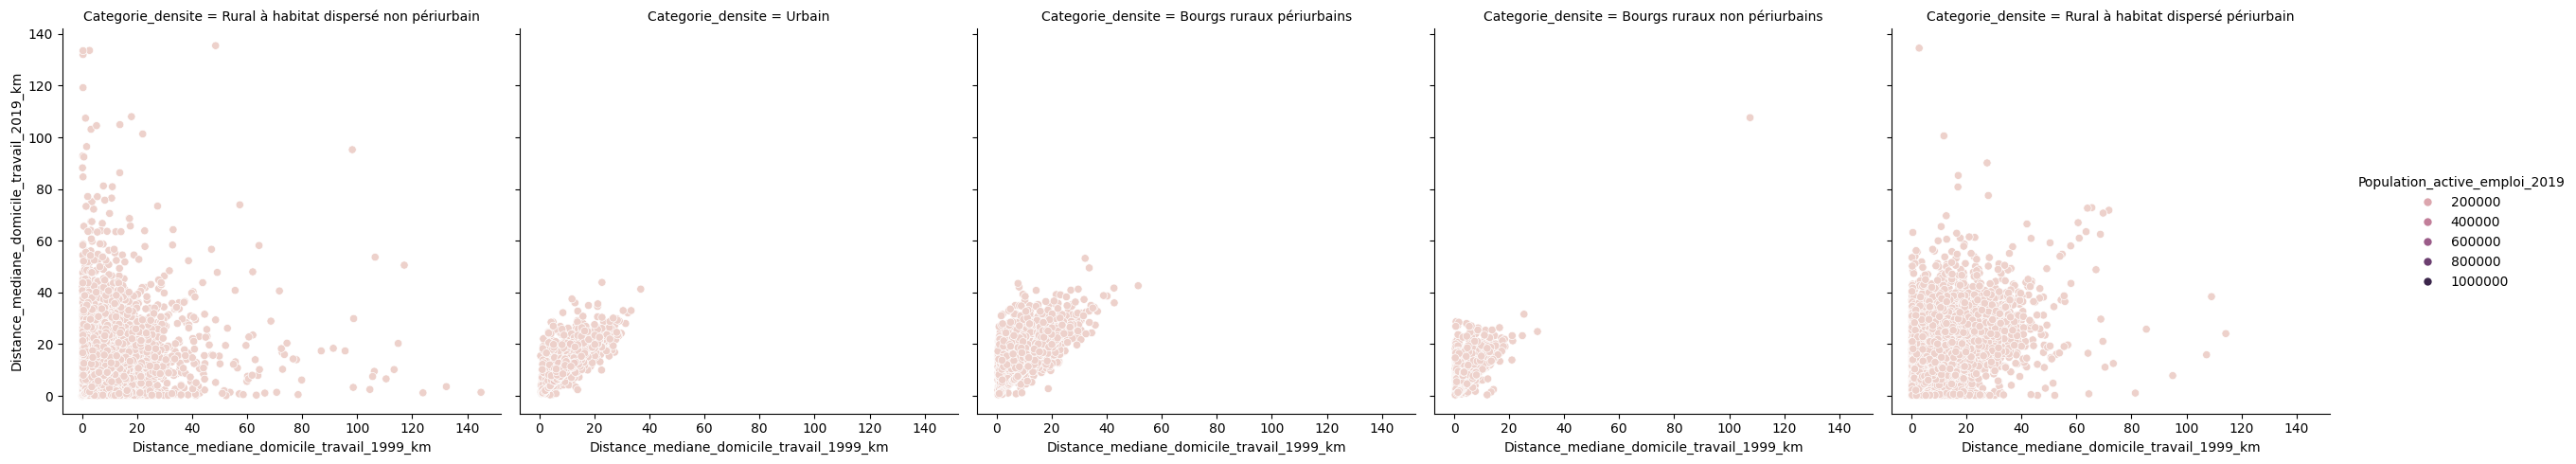

In [3]:
sns.relplot(data=df2, x='Distance_mediane_domicile_travail_1999_km', y='Distance_mediane_domicile_travail_2019_km', 
            col='Categorie_densite', hue='Population_active_emploi_2019',   # time vaut 'Lunch' ou 'Dinner'
           );

Ce graphique montre que globalement les distances parcourues pour aller au travail n'ont pas évolué en moyenne. Seulement en ville (orange) la variance entre ces 2 périodes a été très faible : une grosse v

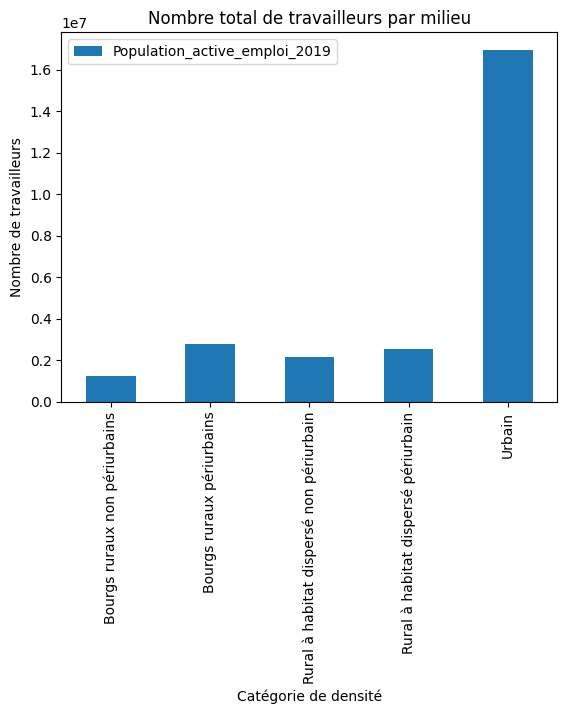

In [4]:
df2population = df2[['Population_active_emploi_2019', 'Categorie_densite']]

by_method = df2population.groupby('Categorie_densite')

counts = by_method.sum()
counts.plot(kind='bar')

plt.title('Nombre total de travailleurs par milieu')
plt.xlabel('Catégorie de densité')
plt.ylabel('Nombre de travailleurs')


# Affichage
plt.show()

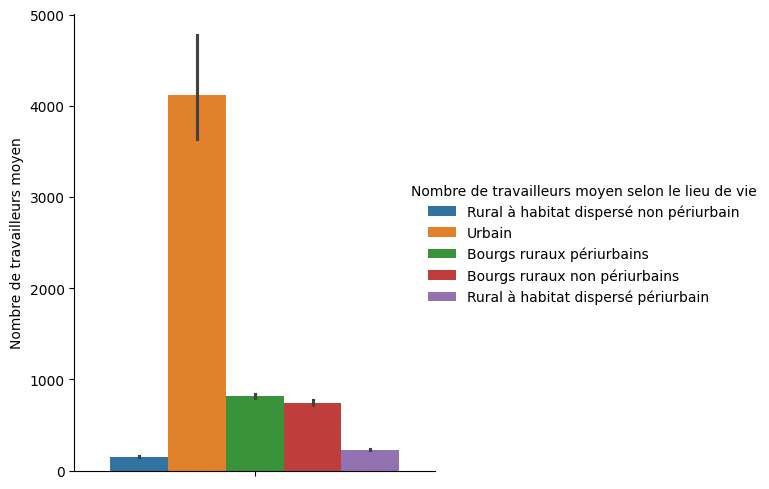

In [5]:
g = sns.catplot(
    data=df2population, kind="bar",
    hue="Categorie_densite", y="Population_active_emploi_2019")
g.set_axis_labels("", "Nombre de travailleurs moyen")
g.legend.set_title("Nombre de travailleurs moyen selon le lieu de vie")

On représente ici les effectifs de population active en foction da catégirie de densité de l’endroit où les personnes habitent. On remarque sans surprise que ce sont les zones urbaines qui l’emportent avec plus de 4000 travailleurs par commune. De plus, les zones avec la plus faible densité de population sont les zones où il y a le moins de travailleurs.

On remarque également que pour les villes l’incertitude est la plus haute, et plus vers les hautes populations : il y a en effet des villes de taille très variées (dont de très grosses) ce qui augmente cette valeur.

# Evolution de la population active entre 1999 et 2019

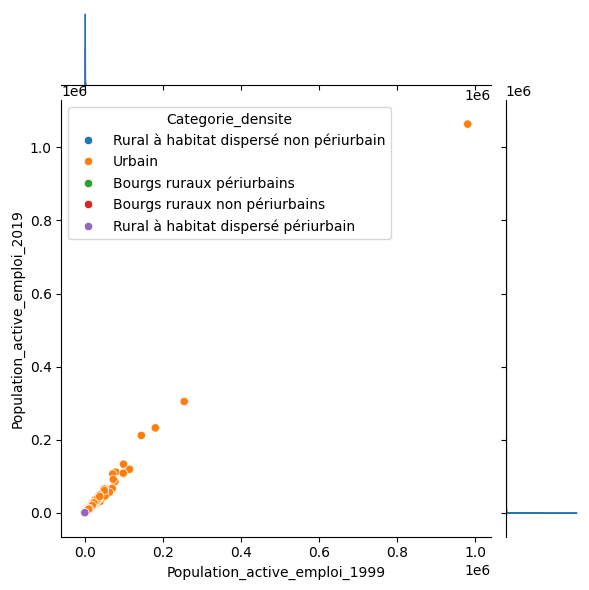

In [6]:
sns.jointplot(
    data=df2,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

Globalement, la population active n’a pas l’air d’avoir changée depuis 1999. Mais les données sont concentrées sur les faibles populations actives. Donc l’échelle proposée est faussée par les villes à très grande population active.

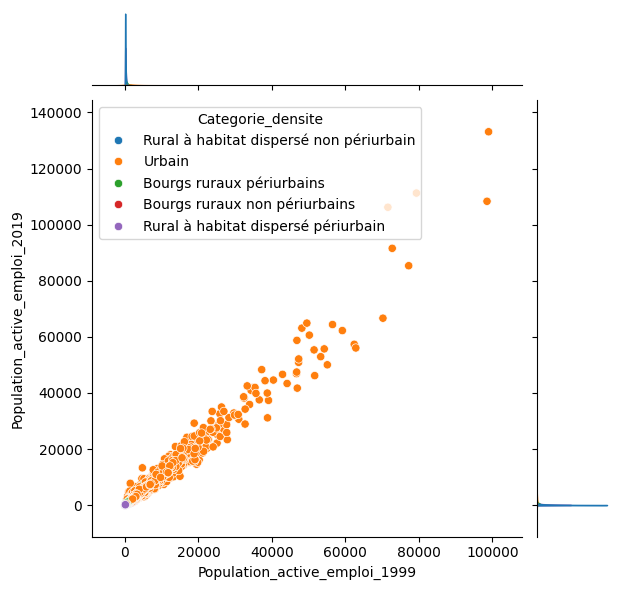

In [8]:
df3 = df2[df2["Population_active_emploi_1999"]<1e5] #On masque les villes avec plus de 100000 actifs
sns.jointplot(
    data=df3,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

On observe alors qu’en fait la population active a légèrement augmenté. Cependant, on observe toujours uniquement les données du milieu urbain.

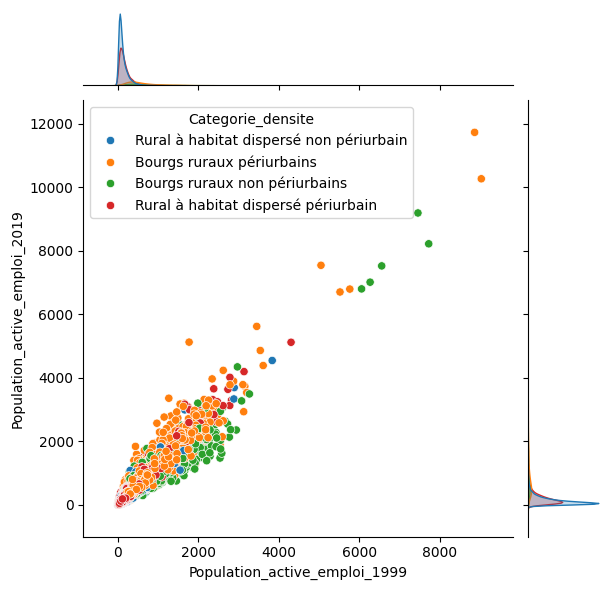

In [9]:
df4 = df3[df3["Categorie_densite"]!="Urbain"] #On masque les villes en milieur urbain
sns.jointplot(
    data=df4,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

Hors milieu urbain, on observe une hausse de la population active pour quelques communes. Mais la plupart des communes ont une population active de moins de 2000 et on voit mal la répartition dans cette zone.

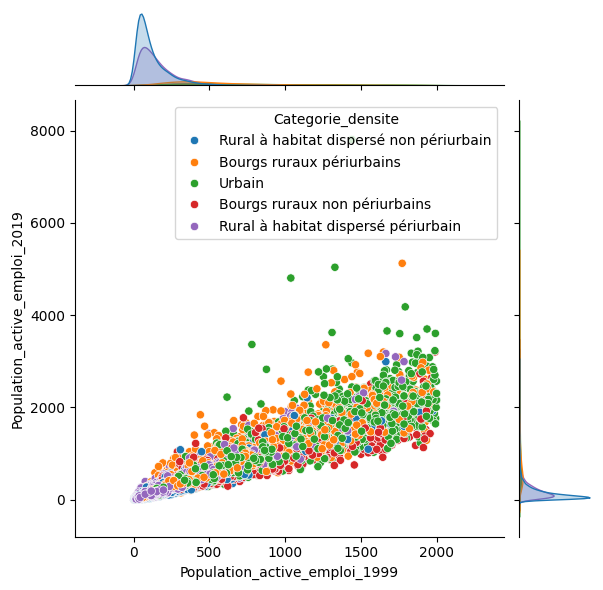

In [10]:
df5 = df2[df2["Population_active_emploi_1999"]<2000] #On s'intéresse uniquement aux communes de population active inférieure à 2000
sns.jointplot(
    data=df5,
    x='Population_active_emploi_1999',
    y='Population_active_emploi_2019',
    hue='Categorie_densite'
);

En zoomant, on voit que la plupart des communes qui avait moins de 2000 actifs en 1999 en ont toujours moins de 2000 en 2019. Mais certaines ont grandit jusqu’à environ 5000 actifs.